In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, MaxPooling1D, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.normalization import BatchNormalization
import numpy
import sys
import os
from matplotlib import pyplot
from keras.models import model_from_json

C:\Users\ayses\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

# fix random seed for reproducibility
numpy.random.seed(7)

# load input dataset
dataset = numpy.loadtxt("tez_input_data.data", delimiter=",")

# split into input (X) variables
#InputValues = dataset.T
InputValues = dataset
nrows, ncols = InputValues.shape
InputValues = InputValues.reshape(nrows, ncols, 1)
print(InputValues.shape)

# load output dataset
dataset = numpy.loadtxt("tez_output_data.data", delimiter=",")
#OutputValues = dataset.T
OutputValues = dataset
nrows, ncols = OutputValues.shape
OutputValues = OutputValues.reshape(nrows, ncols)
print(OutputValues.shape)

print("data loaded")



(7451, 1200, 1)
(7451, 1200)
data loaded


In [3]:
model = Sequential()

model.add(Conv1D(kernel_size = 3, filters = 50, input_shape=(1200,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(1, padding='same'))

#c2
model.add(Conv1D(kernel_size = (1), filters = 50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(1, padding='same'))

#c3
model.add(Conv1D(kernel_size = (1), filters = 50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(1, padding='same'))

model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dense(1200, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1200, 50)          200       
_________________________________________________________________
batch_normalization_1 (Batch (None, 1200, 50)          200       
_________________________________________________________________
activation_1 (Activation)    (None, 1200, 50)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1200, 50)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1200, 50)          2550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 1200, 50)          200       
_________________________________________________________________
acti

In [4]:
print("running")

# Fit the model
history = model.fit(InputValues, OutputValues, epochs=5, batch_size=10, verbose=2)


# evaluate the model
scores = model.evaluate(InputValues, OutputValues)
print("\nevaluate -> %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



running
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 149s - loss: 0.0932 - acc: 0.9821
Epoch 2/5
 - 151s - loss: 0.0862 - acc: 0.9821
Epoch 3/5
 - 152s - loss: 0.0842 - acc: 0.9821
Epoch 4/5
 - 149s - loss: 0.0825 - acc: 0.9821
Epoch 5/5
 - 149s - loss: 0.0812 - acc: 0.9821
7451/7451 [==============================] - 16s 2ms/step

evaluate -> acc: 98.21%


dict_keys(['loss', 'acc'])


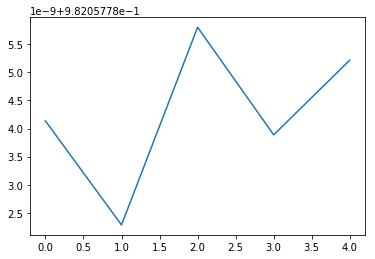

In [5]:
print(history.history.keys())

pyplot.plot(history.history['acc'])
pyplot.show()

In [6]:
# save model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")

print("Saved model to disk")


Saved model to disk


In [ ]:
# load json and create model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")

print("Loaded model from disk")


In [28]:
#test folders

test_folders = []

test_folders.append("ALU\\120kure alu 268.dxf\\") #0
test_folders.append("ALU\\alüminyumdetaybuyuk1 268 alu.dxf\\") #1
test_folders.append("ALU\\dırektaban 268 alu.dxf\\") #2
test_folders.append("ALU\\huniemsan550 alu 272.dxf\\")#3
test_folders.append("ALU\\luva127pul34 alu 272.dxf\\")#4
test_folders.append("ALU\\luva117253ekim alu 272.dxf\\")#5
test_folders.append("ALU\\mobesecap34cm alu 272.dxf\\")#6
test_folders.append("ALU\\nikielektronik1 alu 272.dxf\\")#7
test_folders.append("ALU\\yunus alu 272.dxf\\")#8
test_folders.append("DKP\\52ayak dkp 268 .dxf\\")#9
test_folders.append("DKP\\570x5cmbombe 265 dkp.dxf\\")#10
test_folders.append("DKP\\akımmetal600cap9cm 268 dkp.dxf\\")#11
test_folders.append("DKP\\bizimmasaçap500 dkp 268.dxf\\")#12
test_folders.append("DKP\\bugas143 dkp 266.dxf\\")#13
test_folders.append("DKP\\canmetal dkp 266.dxf\\")#14
test_folders.append("DKP\\huni335mm dkp 268.dxf\\")#15
test_folders.append("DKP\\hunisehpayenikalıpsıvama dkp 268.dxf\\")#16
test_folders.append("DKP\\küçüknugas dkp 266.dxf\\")#17
test_folders.append("DKP\\metalikssaksı450 dkp 268.dxf\\")#18
test_folders.append("DKP\\saksıaltdemirmakara dkp 268.dxf\\")#19
test_folders.append("DKP\\ünalabi485pul huni dkp 272.dxf\\")#20
test_folders.append("PAS\\350lavabo ayak pas 265.dxf\\")#21
test_folders.append("PAS\\alirozet pas 266.dxf\\")#22
test_folders.append("PAS\\huni175  pas 267.dxf\\")#23
test_folders.append("PAS\\karalarpaslanmaz 267.dxf\\")#24
test_folders.append("PAS\\kardesanpaslanmaz330 265.dxf\\")#25
test_folders.append("PAS\\lavabo17ocaknearc pas 267.dxf\\")#26
test_folders.append("PAS\\lavabodiketek pas 267.dxf\\")#27
test_folders.append("PAS\\ömerkarasu1 pas 268.dxf\\")#28
test_folders.append("PAS\\paslamazkapak1  pas 268.dxf\\")#29
test_folders.append("PAS\\paslanmaz108şapka 266.dxf\\")#30
test_folders.append("PAS\\paslanmaztaban 268.dxf\\")#31
test_folders.append("PAS\\salimlavabo pas 266.dxf\\")#32
test_folders.append("PAS\\tevrat ayakkücük pas 268.dxf\\")#33
test_folders.append("PAS\\tevratabipaslanmaz 268.dxf\\")#34

print(len(test_folders))


35


In [31]:
#test

base_dir = "C:\\WORK\\Projects\\Sivama\\dxf\\test_data\\"
for j in range(len(test_folders)):
    path = os.path.join(base_dir, test_folders[j]) 
    filenameInput = os.path.join(path, "tez_input_testdata.test")
    filenameOutput = os.path.join(path, "tez_output_testdata.test")
    filenamePredict = os.path.join(path, "tez_result_data.predict")

    print(filenameInput)
    print(filenameOutput)

    # load input dataset
    dataset = numpy.loadtxt(filenameInput, delimiter="\t")

    # split into input (X) variables
    InputTestValues = dataset
    nrows, ncols = InputTestValues.shape
    InputTestValues = InputTestValues.reshape(nrows, ncols, 1)
    print(InputTestValues.shape)

    # load output dataset
    dataset = numpy.loadtxt(filenameOutput, delimiter="\t")
    OutputTestValues = dataset
    nrows, ncols = OutputTestValues.shape
    OutputTestValues = OutputTestValues.reshape(nrows, ncols)
    print(OutputTestValues.shape)

    print("test data loaded")

    # calculate predictions
    predictions = model.predict(InputTestValues)

    result = numpy.zeros(shape=(nrows, ncols))
    print(result.shape)

    for j in range(len(predictions)):
        for i in range(len(predictions[0])):
            if predictions[j][i] * 100 > 1: 
                result[j][i] = 1
            else:
                result[j][i] = 0            


    numpy.savetxt(filenamePredict, result, fmt='%1d', delimiter='\t', newline='\n', header='', footer='', comments='# ', encoding=None)
    print("test data saved")           


C:\WORK\Projects\Sivama\dxf\test_data\ALU\120kure alu 268.dxf\tez_input_testdata.test
C:\WORK\Projects\Sivama\dxf\test_data\ALU\120kure alu 268.dxf\tez_output_testdata.test
(21, 1200, 1)
(21, 1200)
test data loaded
(21, 1200)
test data saved
C:\WORK\Projects\Sivama\dxf\test_data\ALU\alüminyumdetaybuyuk1 268 alu.dxf\tez_input_testdata.test
C:\WORK\Projects\Sivama\dxf\test_data\ALU\alüminyumdetaybuyuk1 268 alu.dxf\tez_output_testdata.test
(28, 1200, 1)
(28, 1200)
test data loaded
(28, 1200)
test data saved
C:\WORK\Projects\Sivama\dxf\test_data\ALU\dırektaban 268 alu.dxf\tez_input_testdata.test
C:\WORK\Projects\Sivama\dxf\test_data\ALU\dırektaban 268 alu.dxf\tez_output_testdata.test
(32, 1200, 1)
(32, 1200)
test data loaded
(32, 1200)
test data saved
C:\WORK\Projects\Sivama\dxf\test_data\ALU\huniemsan550 alu 272.dxf\tez_input_testdata.test
C:\WORK\Projects\Sivama\dxf\test_data\ALU\huniemsan550 alu 272.dxf\tez_output_testdata.test
(78, 1200, 1)
(78, 1200)
test data loaded
(78, 1200)
test d

test data saved
C:\WORK\Projects\Sivama\dxf\test_data\PAS\tevratabipaslanmaz 268.dxf\tez_input_testdata.test
C:\WORK\Projects\Sivama\dxf\test_data\PAS\tevratabipaslanmaz 268.dxf\tez_output_testdata.test
(38, 1200, 1)
(38, 1200)
test data loaded
(38, 1200)
test data saved


In [22]:

index = 5
for j in range(nrows):
    print("%d Y:%d R:%d" % (j, OutputTestValues[index][j], result[index][j]))
                    


0 Y:0 R:0
1 Y:0 R:0
2 Y:0 R:0
3 Y:0 R:0
4 Y:0 R:0
5 Y:0 R:0
6 Y:0 R:0
7 Y:0 R:0
8 Y:0 R:0
9 Y:0 R:0
10 Y:0 R:0
11 Y:0 R:0
12 Y:0 R:0
13 Y:0 R:0
14 Y:0 R:0
15 Y:0 R:0
16 Y:0 R:0
17 Y:0 R:0
18 Y:0 R:0
19 Y:0 R:0
20 Y:0 R:0
